In [6]:
import gdown
import zipfile
import os
from google.colab import userdata
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

In [1]:
file_id = userdata.get('mapas')
# URL de descarga directa
url = f'https://drive.google.com/uc?id={file_id}'
# Nombre del archivo que deseas guardar
output = 'csv.zip'  # Cambia la extensión según el archivo

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1skF46OMId7OYZTPMXa0_0yNSn4EQoaPe
To: /content/csv.zip
100%|██████████| 11.8M/11.8M [00:00<00:00, 142MB/s]


'csv.zip'

In [3]:
archivo_zip = "/content/csv.zip"
directorio_destino = "/content"

# Descomprimir el archivo ZIP
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)



In [7]:
df = pd.read_csv('/content/csv/mesa_primarias_alcalde_2024_comuna.csv')
datos_geojson = gpd.read_file('/content/csv/Comunas_de_Chile.geojson')

# Hacer la unión usando la columna 'comuna'
comunas = datos_geojson.merge(df, on='comuna', how='left')


In [8]:
print(df.columns)
print(df[df['comuna'] == "PROVIDENCIA"]['candidatos_nombres'][2914])
df.iloc[2914]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'region', 'id_region', 'cirsen',
       'id_cirsen', 'distrito', 'id_distrito', 'provincia', 'id_provincia',
       'comuna', 'id_comuna', 'local', 'id_local', 'mesa', 'id_mesa',
       'blancos', 'nulos', 'total_emitidos', 'electores', 'participacion',
       'candidatos_nombres', 'candidatos_resultados', 'candidatos_comuna',
       'path_s3', 'total_general', 'candidato_ganador', 'partido_ganador',
       'pacto_ganador', 'votos_ganador'],
      dtype='object')
[{'id_candidato': 15469674, 'id_partido': 130, 'id_pacto': 396, 'votos': 2, 'electo': False, 'orden_voto': 12, 'candidato': 'GIOVANKA PENELOPE LUENGO FIGUEROA', 'partido': 'FEDERACION REGIONALISTA VERDE SOCIAL', 'pacto': 'CONTIGO CHILE MEJOR'}, {'id_candidato': 18472576, 'id_partido': 137, 'id_pacto': 396, 'votos': 1, 'electo': False, 'orden_voto': 13, 'candidato': 'BARTOLOME REUS CORDERO', 'partido': 'PARTIDO LIBERAL DE CHILE', 'pacto': 'CONTIGO CHILE MEJOR'}, {'id_candidato': 9522094, 'id

Unnamed: 0.1                                                          2914
Unnamed: 0                                                            2914
region                                           METROPOLITANA DE SANTIAGO
id_region                                                             3013
cirsen                                        CIRCUNSCRIPCIÓN SENATORIAL 7
id_cirsen                                                             5007
distrito                                                       DISTRITO 10
id_distrito                                                           6010
provincia                                                         SANTIAGO
id_provincia                                                          4131
comuna                                                         PROVIDENCIA
id_comuna                                                             2780
local                               CAMPUS ORIENTE UNIVERSIDAD CATOLICA L1
id_local                 

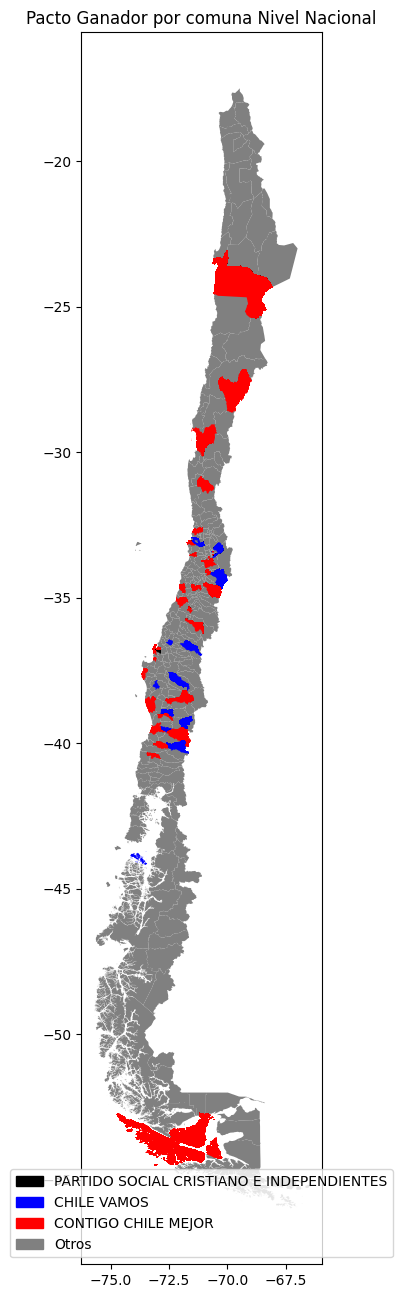

In [9]:

# Definir una función para asignar colores a las categorías
def color_producer(categoria):
    if categoria == 'PARTIDO SOCIAL CRISTIANO E INDEPENDIENTES':
        return 'black'
    elif categoria == 'CHILE VAMOS':
        return 'blue'
    elif categoria == 'CONTIGO CHILE MEJOR':
        return 'red'
    else:
        return 'gray'

# Aplicar la función de asignación de colores al DataFrame
comunas['color'] = comunas['pacto_ganador'].apply(color_producer)

# Plotea los datos con GeoPandas y aplica el esquema de colores
fig, ax = plt.subplots(figsize=(20, 16))
comunas.plot(ax=ax, color=comunas['color'])
plt.title('Pacto Ganador por comuna Nivel Nacional')

# Definir la leyenda
labels = ['PARTIDO SOCIAL CRISTIANO E INDEPENDIENTES', 'CHILE VAMOS', 'CONTIGO CHILE MEJOR', 'Otros']
colors = ['black', 'blue', 'red', 'gray']
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(labels))]

# Agregar la leyenda al mapa
plt.legend(handles, labels, loc='lower center')

plt.show()


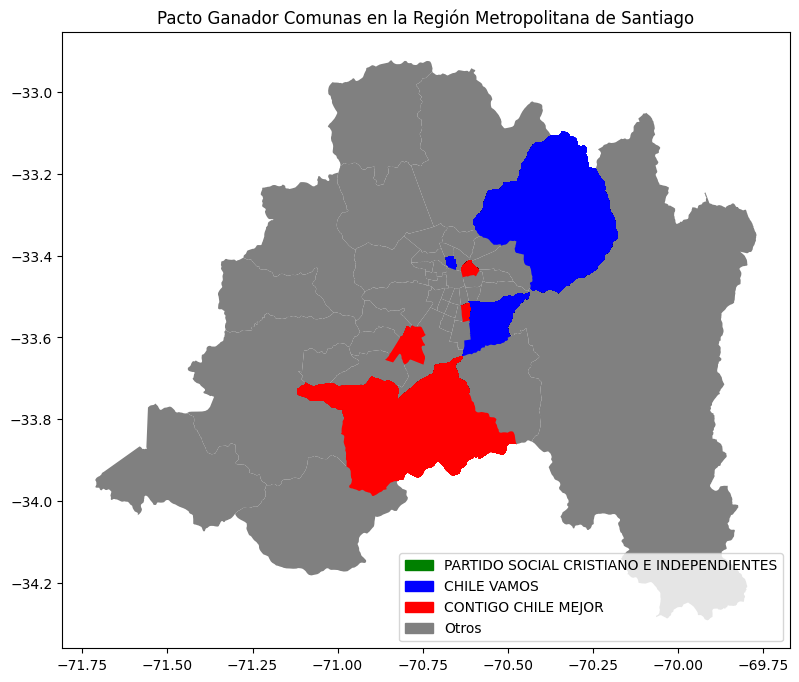

In [10]:

df = pd.read_csv('/content/csv/mesa_primarias_alcalde_2024_comuna.csv')
datos_geojson = gpd.read_file('/content/csv/Comunas_de_Chile.geojson')

# Filtra el GeoDataFrame para la región específica
comunas_filtradas_geo = datos_geojson[datos_geojson['region'] == 13]

# Hace la unión usando la columna 'comuna'
comunas_filtradas = comunas_filtradas_geo.merge(df, on='comuna', how='left')

# Define una función para asignar colores a las categorías
def color_producer(categoria):
    if categoria == 'PARTIDO SOCIAL CRISTIANO E INDEPENDIENTES':
        return 'black'
    elif categoria == 'CHILE VAMOS':
        return 'blue'
    elif categoria == 'CONTIGO CHILE MEJOR':
        return 'red'
    else:
        return 'gray'

# Aplica la función de asignación de colores al DataFrame
comunas_filtradas['color'] = comunas_filtradas['pacto_ganador'].apply(color_producer)

# Plotea los datos con GeoPandas y aplica el esquema de colores
comunas_filtradas.plot(color=comunas_filtradas['color'], figsize=(10, 8))
plt.title('Pacto Ganador Comunas en la Región Metropolitana de Santiago')
# Definir la leyenda
labels = ['PARTIDO SOCIAL CRISTIANO E INDEPENDIENTES', 'CHILE VAMOS', 'CONTIGO CHILE MEJOR', 'Otros']
colors = ['green', 'blue', 'red', 'gray']
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(labels))]

# Agregar la leyenda al mapa
plt.legend(handles, labels, loc='lower right')

plt.show()


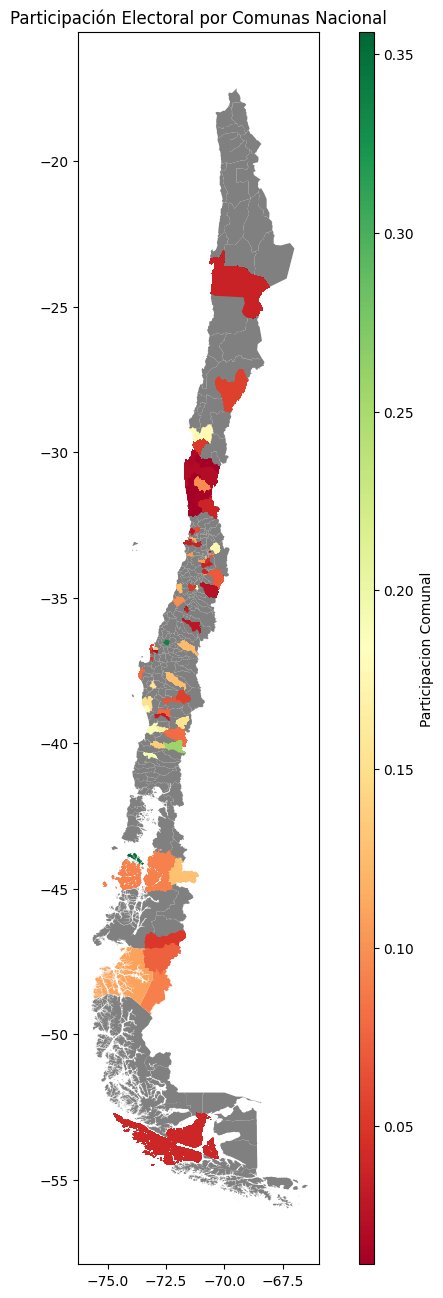

In [11]:
df = pd.read_csv('/content/csv/participacion.csv')
datos_geojson = gpd.read_file('/content/csv/Comunas_de_Chile.geojson')
# Asegúrate de que la columna 'comuna' esté presente y en el mismo formato en ambos DataFrames
# Hacer la unión usando la columna 'comuna'
comunas = datos_geojson.merge(df, on='comuna', how='left')

# Crear una nueva columna 'color' usando la columna 'participacion_electoral_comunal'
norm = Normalize(vmin=df['participacion_electoral_comunal'].min(), vmax=df['participacion_electoral_comunal'].max())
cmap = plt.get_cmap('RdYlGn')  # Usar una colormap de rojo a verde

# Asignar colores, usando gris para valores nulos
comunas['color'] = comunas['participacion_electoral_comunal'].apply(
    lambda x: 'grey' if pd.isnull(x) else cmap(norm(x))
)

# Plotea los datos con GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
comunas.plot(color=comunas['color'], ax=ax)
plt.title('Participación Electoral por Comunas Nacional')

# Crear una barra de color
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Participacion Comunal')
# Añadir título y mostrar el gráfico

plt.show()


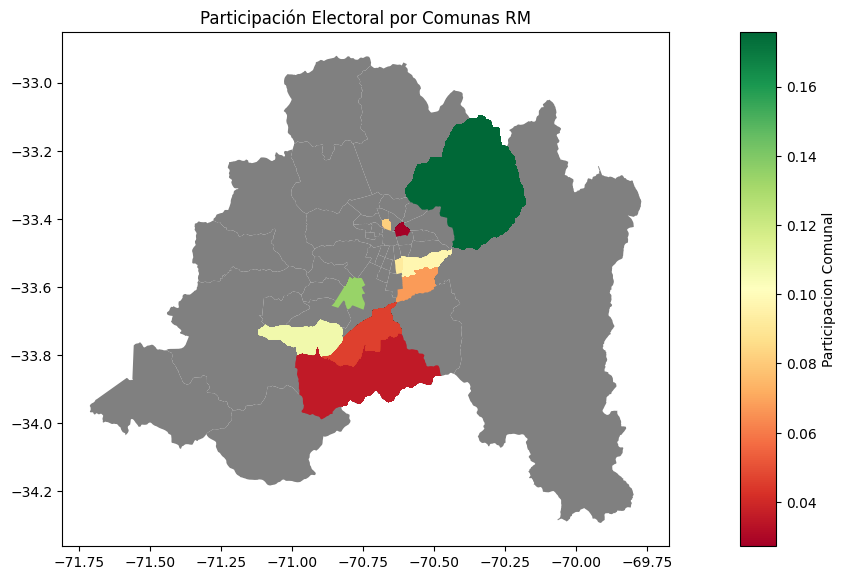

In [12]:
df = pd.read_csv('/content/csv/participacion.csv')
datos_geojson = gpd.read_file('/content/csv/Comunas_de_Chile.geojson')

datos_geojson = datos_geojson[datos_geojson['region'] == 13]

df = df[df['region'] == "METROPOLITANA DE SANTIAGO"]

# Asegúrate de que la columna 'comuna' esté presente y en el mismo formato en ambos DataFrames
# Hacer la unión usando la columna 'comuna'
comunas = datos_geojson.merge(df, on='comuna', how='left')

# Crear una nueva columna 'color' usando la columna 'participacion_electoral_comunal'
norm = Normalize(vmin=df['participacion_electoral_comunal'].min(), vmax=df['participacion_electoral_comunal'].max())
cmap = plt.get_cmap('RdYlGn')  # Usar una colormap de rojo a verde

# Asignar colores, usando gris para valores nulos
comunas['color'] = comunas['participacion_electoral_comunal'].apply(
    lambda x: 'grey' if pd.isnull(x) else cmap(norm(x))
)


# Plotea los datos con GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
comunas.plot(color=comunas['color'], ax=ax)
plt.title('Participación Electoral por Comunas RM')

# Crear una barra de color
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Participacion Comunal')
# Añadir título y mostrar el gráfico

plt.show()


In [ ]:
# Cargar datos

df = pd.read_csv('/content/csv/participacion.csv')
datos_geojson = gpd.read_file('/content/csv/Comunas_de_Chile.geojson')
datos_geojson = datos_geojson[datos_geojson['region'] == 13]

df = df[df['region'] == "METROPOLITANA DE SANTIAGO"]

# Asegúrate de que la columna 'comuna' esté presente y en el mismo formato en ambos DataFrames
# Hacer la unión usando la columna 'comuna'
comunas = datos_geojson.merge(df, on='comuna', how='left')

# Crear el mapa
m = folium.Map(
    location=[-33.45, -70.6667],
    zoom_start=10.5,
    scrollWheelZoom= False,
    doubleClickZoom= False

)
# Añadir nombres de las comunas como popups solo si tienen valores no nulos
for index, row in comunas.iterrows():
    if pd.notna(row['participacion_electoral_comunal']):
        popup_text = f"{row['comuna']}: {row['participacion_electoral_comunal']}"
        folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x], popup=popup_text).add_to(m)

# Añadir datos coropléticos al mapa
folium.Choropleth(
    geo_data=comunas,
    data=comunas,
    columns=['comuna', 'participacion_electoral_comunal'],
    key_on='feature.properties.comuna',
    fill_color='RdYlGn',
    fill_opacity=0.2,  # Ajusta la opacidad del color
    line_opacity=0.5,
    legend_name='Participación Comunal',
).add_to(m)

# Añadir título
title_html = '<h3 align="center" style="font-size:20px"><b>Participación Electoral por Comunas RM</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Guardar el mapa como un archivo HTML
m.save('mapa_interactivo_participacion.html')

m



In [ ]:
df = pd.read_csv('/content/csv/mesa_primarias_alcalde_2024_comuna.csv')
datos_geojson = gpd.read_file('/content/csv/Comunas_de_Chile.geojson')

# Filtrar el GeoDataFrame para la región específica
comunas_filtradas_geo = datos_geojson[datos_geojson['region'] == 13]

# Hacer la unión usando la columna 'comuna'
comunas_filtradas = comunas_filtradas_geo.merge(df, on='comuna', how='left')

# Definir una función para asignar colores a las categorías
def color_producer(categoria):
    if categoria == 'PARTIDO SOCIAL CRISTIANO E INDEPENDIENTES':
        return 'black'
    elif categoria == 'CHILE VAMOS':
        return 'blue'
    elif categoria == 'CONTIGO CHILE MEJOR':
        return 'red'
    else:
        return 'gray'

# Aplicar la función de asignación de colores al DataFrame
comunas_filtradas['color'] = comunas_filtradas['pacto_ganador'].apply(color_producer)

# Crear el mapa interactivo centrado en la Región Metropolitana
m = folium.Map(
    location=[-33.45, -70.6667],
    zoom_start=10.5,
    scrollWheelZoom= False,
    doubleClickZoom= False
)
# Añadir nombres de las comunas como popups solo si tienen valores no nulos
for index, row in comunas_filtradas.iterrows():
    if pd.notna(row['pacto_ganador']):
        popup_text = f"{row['comuna']}: {row['pacto_ganador']}"
        folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x], popup=popup_text).add_to(m)

# Añadir las comunas al mapa con colores
for _, row in comunas_filtradas.iterrows():
    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, color=row['color']: {
            'fillColor': color,
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.5,
        }
    ).add_child(folium.Popup(row['comuna'])).add_to(m)

# Añadir título

# Añadir título
title_html = '<h3 align="center" style="font-size:20px"><b>Pacto Ganador por columnas</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Mostrar el mapa
m.save('mapa_interactivo_pacto_ganador.html')

m